## Final Project  - Neural Networks in Economics
### Eun Ju Jong

*ALL THE VARIABLES ARE LAGGED 1 YEAR	

[Variables	Label]

FDI Inflows - fdi

Market Size (log of GDP) - mktsize

GDP Growth - gdpgrwth

Development level (GDP Per CapitaGDP Per Capita) - gdpcap

Budget Deficit - def

General Government Consumption - govcsmp

Trade openness - trade

Under/Signed 1995-2017 - used

Inflation - inf

Domestic Investment - dominv

Short-term debt - sdebt

th

**Note that the following data is only part of the data I had used in my thesis.**
**Endogenour VAR: 

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import os
import pandas as pd
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from pandas import ExcelFile

In [2]:
xl = pd.ExcelFile("ECNThesisData.xlsx")
print(xl.sheet_names)
imf = xl.parse("All")
imf.head()

['Data Info', 'All', 'FDI', 'GDPCapita', 'Market Size', 'GDP Growth', 'Trade', 'Gov. Cons.', 'Budget Deficit', 'Inflation', 'Dom Invst.', 'Shortterm Debt', 'IMF Arr', 'East Asia and Pacific', 'Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'South Asia', 'Sub-saharan Africa', 'Soviet Un.', 'Year dummies']


,Country,Year,FDI,Lagged GDPcap,Lagged Mktsz,Lagged GDP Growth,Lagged Trade,Lagged Gov Consmp,Lagged Deficit,Lagged Inflation,...,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23
0,Albania,1995,2.927576,6.393236,7.539533,10.608391,48.950450,13.850000,NaN,2.128790,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1996,2.815627,6.644643,7.780205,27.210385,47.610595,13.646130,-7.80,12.255360,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1997,2.136961,6.939812,8.070794,33.721531,44.895427,9.357657,-9.85,22.565907,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1998,1.761765,6.576036,7.707357,-30.471784,45.425523,10.426260,-11.90,-22.020468,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1999,1.278836,6.710909,7.845756,14.843432,48.137484,10.716920,-9.93,5.526141,...,0,0,0,0,0,0,0,0,0,0


In [3]:
imf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 44 columns):
Country                         2185 non-null object
Year                            2185 non-null int64
FDI                             2178 non-null float64
Lagged GDPcap                   2185 non-null float64
Lagged Mktsz                    2185 non-null float64
Lagged GDP Growth               2185 non-null float64
Lagged Trade                    2172 non-null float64
Lagged Gov Consmp               2183 non-null float64
Lagged Deficit                  2080 non-null float64
Lagged Inflation                2170 non-null float64
Lagged Dom Inv                  2185 non-null float64
Lagged Used                     2185 non-null int64
Lagged End                      2185 non-null int64
Lagged Have                     2185 non-null int64
East Asia and Pacific           2185 non-null int64
Europe and Central Asia         2185 non-null int64
Latin America and Caribbean     2185 non-n

In [4]:
imf["Country"].value_counts()

Eswatini (Swaziland)    23
Cabo Verde              23
Peru                    23
Bhutan                  23
Indonesia               23
                        ..
Angola                  23
Guatemala               23
Tonga                   23
Bangladesh              23
Zimbabwe                23
Name: Country, Length: 95, dtype: int64

In [5]:
imf["Year"].value_counts()

2017    95
2016    95
1998    95
2000    95
2002    95
2004    95
2006    95
2008    95
2010    95
2012    95
2014    95
1995    95
2015    95
1997    95
1999    95
2001    95
2003    95
2005    95
2007    95
2009    95
2011    95
2013    95
1996    95
Name: Year, dtype: int64

In [6]:
imf["Lagged Used"].value_counts()

0    1501
1     684
Name: Lagged Used, dtype: int64

In [7]:
imf["Lagged Have"].value_counts()

1    1633
0     552
Name: Lagged Have, dtype: int64

In [8]:
imf["East Asia and Pacific"].value_counts()

0    1771
1     414
Name: East Asia and Pacific, dtype: int64

In [9]:
imf["Europe and Central Asia"].value_counts()

0    1840
1     345
Name: Europe and Central Asia, dtype: int64

In [10]:
imf["Latin America and Caribbean"].value_counts()

0    1679
1     506
Name: Latin America and Caribbean, dtype: int64

In [11]:
imf["Middle East and North Africa"].value_counts()

0    1978
1     207
Name: Middle East and North Africa, dtype: int64

In [12]:
imf["South Asia"].value_counts()

0    2047
1     138
Name: South Asia, dtype: int64

In [13]:
imf["Sub-saharan Africa"].value_counts()

0    1656
1     529
Name: Sub-saharan Africa, dtype: int64

In [14]:
imf["Soviet Union"].value_counts()

0    1978
1     207
Name: Soviet Union, dtype: int64

In [15]:
imf.describe()

,Year,FDI,Lagged GDPcap,Lagged Mktsz,Lagged GDP Growth,Lagged Trade,Lagged Gov Consmp,Lagged Deficit,Lagged Inflation,Lagged Dom Inv,...,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23
count,2185.000000,2178.000000,2185.000000,2185.000000,2185.000000,2172.000000,2183.000000,2080.000000,2170.000000,2185.000000,...,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000
mean,2006.000000,4.161262,7.655757,9.528832,7.703871,81.967949,15.619948,-2.414323,3.229645,25.116855,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478
std,6.634768,5.376648,0.920223,2.292225,14.203199,35.233033,7.515293,12.534282,11.269153,9.352164,...,0.203978,0.203978,0.203978,0.203978,0.203978,0.203978,0.203978,0.203978,0.203978,0.203978
min,1995.000000,-37.154800,4.866927,4.003887,-99.952383,0.020999,2.047121,-487.310000,-58.329342,0.272178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,1.158795,6.994872,7.959210,0.646715,55.593310,11.120205,-4.592500,-1.834955,19.166652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,2.737902,7.683451,9.550564,7.229923,78.904304,14.422390,-2.360000,2.613945,23.287498,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,5.739440,8.342625,11.115694,14.761283,103.550856,18.131065,-0.030000,8.480523,28.886689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,72.792530,10.040751,16.230623,92.131813,225.412181,63.631940,125.140000,71.443123,95.168750,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
corr_matrix = imf.corr()
corr_matrix["FDI"].sort_values(ascending=False)

FDI                             1.000000
Lagged Trade                    0.275899
Lagged Dom Inv                  0.164985
Lagged GDP Growth               0.100251
y14                             0.079855
y13                             0.075218
Soviet Union                    0.056743
Year                            0.056430
Europe and Central Asia         0.054241
Lagged Inflation                0.051315
y12                             0.050176
Latin America and Caribbean     0.045837
Lagged GDPcap                   0.041251
Lagged End                      0.033817
y15                             0.032691
Lagged Gov Consmp               0.030154
y17                             0.023736
y16                             0.016746
Lagged Used                     0.015729
y18                             0.013316
y4                              0.010629
y10                             0.007344
y19                             0.004561
y11                             0.004362
Sub-saharan Afri

In [17]:
# I applied natural log on FDI to eliminate any country specific characteristics

imf_input = imf
imf_input.insert(2, "ln(FDI)", np.log(imf.FDI))
del imf_input['FDI']
del imf_input['Lagged End']

# There are a lot of NaN because some data values had been left blank due to data unavailability.
# For my previous STATA analysis, I inputed (x_(n-1)+x_(n+1))/2 to NaN x_n.
# I will input the mean value of each var. to all of the NaN values in the currentn models.
imf_input = imf_input.fillna(imf_input.mean())

imf_input.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Country,Year,ln(FDI),Lagged GDPcap,Lagged Mktsz,Lagged GDP Growth,Lagged Trade,Lagged Gov Consmp,Lagged Deficit,Lagged Inflation,...,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23
0,Albania,1995,1.074175,6.393236,7.539533,10.608391,48.950450,13.850000,-2.414323,2.128790,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1996,1.035185,6.644643,7.780205,27.210385,47.610595,13.646130,-7.800000,12.255360,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1997,0.759385,6.939812,8.070794,33.721531,44.895427,9.357657,-9.850000,22.565907,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1998,0.566316,6.576036,7.707357,-30.471784,45.425523,10.426260,-11.900000,-22.020468,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1999,0.245950,6.710909,7.845756,14.843432,48.137484,10.716920,-9.930000,5.526141,...,0,0,0,0,0,0,0,0,0,0


In [18]:
col_mask=imf_input.isnull().any(axis=0) 
row_mask=imf_input.isnull().any(axis=1)
imf_input.loc[row_mask,col_mask]

""


In [19]:
print(imf_input.shape)
print(imf_input["ln(FDI)"].shape)

(2185, 43)
(2185,)


In [36]:
# The first two columns are not needed for learning
# training linear regression
# learning includes the dependent var.
X_train, X_test, y_train, y_test = train_test_split(imf_input.iloc[:, 2:], imf_input["ln(FDI)"], random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(lr.score(X_train, y_train) - lr.score(X_test, y_test), 4))

Training set score: 1.000
Test set score: 1.000
mean squared error: 0.000
r^2: 1.000


In [73]:
# learning without the dependent var.
X_train, X_test, y_train, y_test = train_test_split(imf_input.iloc[:, 3:], imf_input["ln(FDI)"], random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(lr.score(X_train, y_train) - lr.score(X_test, y_test), 4))

Training set score: 0.251
Test set score: 0.208
mean squared error: 1.780
r^2: 0.208


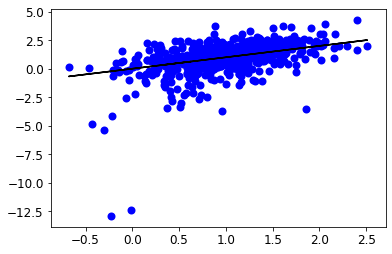

In [101]:
plt.plot(y_pred, y_pred, color='black')
plt.scatter(y_pred, y_test, color='blue', linewidth=2)

In [42]:
j = 0
for i in list(imf_input.head())[3:]:
    print(i, " coeff: ", lr.coef_[j])
    j += 1

Lagged GDPcap  coeff:  0.05102932301538816
Lagged Mktsz  coeff:  -0.0874639451279258
Lagged GDP Growth  coeff:  0.0006165861987318831
Lagged Trade  coeff:  0.007727547269668598
Lagged Gov Consmp  coeff:  -0.011273484127575647
Lagged Deficit  coeff:  -0.006042450277868797
Lagged Inflation  coeff:  -0.0008952526132405324
Lagged Dom Inv  coeff:  0.007573220997459146
Lagged Used  coeff:  0.07379887262475657
Lagged Have  coeff:  0.0001285042185742772
East Asia and Pacific  coeff:  -0.5761620966191064
Europe and Central Asia  coeff:  -0.4027698798103797
Latin America and Caribbean  coeff:  -0.3252311596427622
Middle East and North Africa  coeff:  -0.7137929738790831
South Asia  coeff:  -1.1947434190365602
Sub-saharan Africa  coeff:  -0.7356039324685523
Soviet Union  coeff:  0.08491353513461565
y1  coeff:  -0.6588855898275364
y2  coeff:  -0.5228795760618937
y3  coeff:  -0.37094394488654436
y4  coeff:  -0.1853917497259971
y5  coeff:  -0.2363404833904239
y6  coeff:  -0.22331094099031476
y7  coe

In [45]:
# uses ridge regression
ridge = Ridge();
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(ridge.score(X_train, y_train) - ridge.score(X_test, y_test), 4))

Training set score: 0.251
Test set score: 0.208
mean squared error: 1.780
r^2: 0.208


In [102]:
# uses the conjugate gradient solver
ridge = Ridge(solver="sparse_cg");
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(ridge.score(X_train, y_train) - ridge.score(X_test, y_test), 4))

Training set score: 0.245
Test set score: 0.202
mean squared error: 1.792
r^2: 0.202


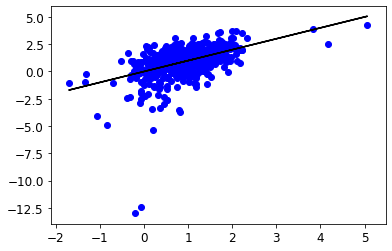

In [109]:
plt.plot(y_pred, y_pred, color='black')
plt.scatter(y_pred, y_test, color='blue')

In [48]:
# check for C-contiguous attributes
X_train.iloc[:,30].flags

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.flags is deprecated and will be removed in a future version
  


  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [49]:
# force the training datasets to be C-contiguous
X_train = np.asarray(X_train, order='C')
y_train = np.asarray(y_train, order='C')

In [50]:
# uses a Stochastic Average Gradient descent
ridge = Ridge(solver="sag");
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(ridge.score(X_train, y_train) - ridge.score(X_test, y_test), 4))

Training set score: 0.193
Test set score: 0.173
mean squared error: 1.857
r^2: 0.173


In [51]:
# linear regression can be improved by applying ridge regression
# does not seem to produce any improvement from the regular linear regression model 
# score: the coefficient of determination R^2 of the prediction.
alp = np.linspace(0,20,100)
for i in alp: 
    ridge = Ridge(alpha=i);
    ridge.fit(X_train, y_train)
    print("a: ", i)
    print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)), " Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
    #print("Disbursement: ", round(ridge.score(X_train, y_train) - ridge.score(X_test, y_test), 4))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22541e-20): result may not be accurate.
  overwrite_a=True).T


a:  0.0
Training set score: 0.251  Test set score: 0.208
a:  0.20202020202020202
Training set score: 0.251  Test set score: 0.208
a:  0.40404040404040403
Training set score: 0.251  Test set score: 0.208
a:  0.6060606060606061
Training set score: 0.251  Test set score: 0.208
a:  0.8080808080808081
Training set score: 0.251  Test set score: 0.208
a:  1.0101010101010102
Training set score: 0.251  Test set score: 0.208
a:  1.2121212121212122
Training set score: 0.251  Test set score: 0.208
a:  1.4141414141414141
Training set score: 0.251  Test set score: 0.207
a:  1.6161616161616161
Training set score: 0.251  Test set score: 0.207
a:  1.8181818181818181
Training set score: 0.251  Test set score: 0.207
a:  2.0202020202020203
Training set score: 0.251  Test set score: 0.207
a:  2.2222222222222223
Training set score: 0.250  Test set score: 0.207
a:  2.4242424242424243
Training set score: 0.250  Test set score: 0.207
a:  2.6262626262626263
Training set score: 0.250  Test set score: 0.207
a:  2

In [52]:
alp = np.linspace(0,20,100)
for i in alp: 
    ridge = Ridge(solver="sag", alpha=i);
    ridge.fit(X_train, y_train)
    print("a: ", i)
    print("Training set score: {:.3f}".format(ridge.score(X_train, y_train)), " Test set score: {:.3f}".format(ridge.score(X_test, y_test)))
    #print("Disbursement: ", round(ridge.score(X_train, y_train) - ridge.score(X_test, y_test), 4))

a:  0.0
Training set score: 0.193  Test set score: 0.173
a:  0.20202020202020202
Training set score: 0.193  Test set score: 0.173
a:  0.40404040404040403
Training set score: 0.193  Test set score: 0.173
a:  0.6060606060606061
Training set score: 0.193  Test set score: 0.173
a:  0.8080808080808081
Training set score: 0.193  Test set score: 0.173
a:  1.0101010101010102
Training set score: 0.193  Test set score: 0.173
a:  1.2121212121212122
Training set score: 0.193  Test set score: 0.173
a:  1.4141414141414141
Training set score: 0.192  Test set score: 0.173
a:  1.6161616161616161
Training set score: 0.192  Test set score: 0.173
a:  1.8181818181818181
Training set score: 0.192  Test set score: 0.173
a:  2.0202020202020203
Training set score: 0.192  Test set score: 0.173
a:  2.2222222222222223
Training set score: 0.192  Test set score: 0.173
a:  2.4242424242424243
Training set score: 0.192  Test set score: 0.173
a:  2.6262626262626263
Training set score: 0.192  Test set score: 0.173
a:  2

In [104]:
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
y_pred= mlp.predict(X_test)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train, y_train) - mlp.score(X_test, y_test), 4))

Accuracy on training set: 0.446
Accuracy on test set: 0.249
mean squared error: 1.688
r^2: 0.249


In [54]:
# uses stochastic gradient descent
mlp = MLPRegressor(solver="sgd", random_state=42)
mlp.fit(X_train, y_train)
y_pred= mlp.predict(X_test)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train, y_train) - mlp.score(X_test, y_test), 4))

Accuracy on training set: 0.182
Accuracy on test set: 0.119
mean squared error: 1.980
r^2: 0.119


In [106]:
# uses a stochastic gradient-based optimizer
mlp = MLPRegressor(solver="adam", random_state=42)
mlp.fit(X_train, y_train)
y_pred= mlp.predict(X_test)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train, y_train) - mlp.score(X_test, y_test), 4))

Accuracy on training set: 0.446
Accuracy on test set: 0.249
mean squared error: 1.688
r^2: 0.249


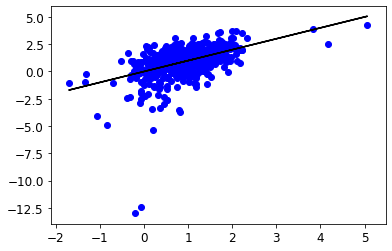

In [108]:
plt.plot(y_pred, y_pred, color='black')
plt.scatter(y_pred, y_test, color='blue')

In [33]:
for i in np.linspace(1, 700, 50):
    mlp = MLPRegressor(solver="adam", max_iter=int(i), random_state=42)
    mlp.fit(X_train, y_train)
    print("max_iter: ", i, " Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)), " Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

max_iter:  1.0  Accuracy on training set: -3.077  Accuracy on test set: -2.032


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  15.26530612244898  Accuracy on training set: 0.105  Accuracy on test set: 0.118


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (29) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  29.53061224489796  Accuracy on training set: 0.247  Accuracy on test set: 0.184


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  43.79591836734694  Accuracy on training set: 0.307  Accuracy on test set: 0.213


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (58) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  58.06122448979592  Accuracy on training set: 0.340  Accuracy on test set: 0.225


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (72) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  72.3265306122449  Accuracy on training set: 0.366  Accuracy on test set: 0.238


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (86) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  86.59183673469389  Accuracy on training set: 0.366  Accuracy on test set: 0.218


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  100.85714285714286  Accuracy on training set: 0.396  Accuracy on test set: 0.238


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  115.12244897959184  Accuracy on training set: 0.408  Accuracy on test set: 0.227


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (129) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  129.3877551020408  Accuracy on training set: 0.406  Accuracy on test set: 0.250


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (143) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter:  143.6530612244898  Accuracy on training set: 0.419  Accuracy on test set: 0.240
max_iter:  157.91836734693877  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  172.18367346938777  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  186.44897959183675  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  200.71428571428572  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  214.9795918367347  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  229.24489795918367  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  243.51020408163265  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  257.7755102040816  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  272.0408163265306  Accuracy on training set: 0.446  Accuracy on test set: 0.249
max_iter:  286.3061224489796  Accuracy on training set: 0.446  Accuracy on test set:

In [57]:
# rescaling training data
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

#print("Training set per-feature maxima:\n{}".format(X_train_scaled.max(axis=0)))
#print("Test set per-feature maxima:\n{}".format(X_test_scaled.max(axis=0)))

In [59]:
mlp = MLPRegressor(max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred= mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.938
Accuracy on test set: 0.088
mean squared error: 2.049
r^2: 0.088


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
mlp = MLPRegressor(solver="adam", max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.938
Accuracy on test set: 0.088
mean squared error: 2.049
r^2: 0.088


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


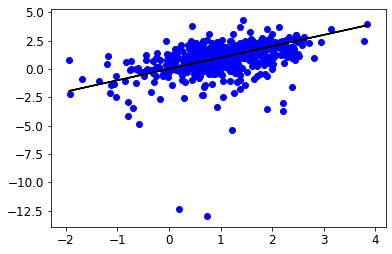

In [111]:
plt.plot(y_pred, y_pred, color='black')
plt.scatter(y_pred, y_test, color='blue')

Though rescaling the data improved the training accuracy, the performance for its prediction is so much worsened. 

In [37]:
mlp = MLPRegressor(solver="adam", learning_rate_init=0.0001, max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.515
Accuracy on test set: 0.239
R^2:  0.2758


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
mlp = MLPRegressor(solver="adam", hidden_layer_sizes=[100, 100], max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.976
Accuracy on test set: -0.033
mean squared error: 2.321
r^2: -0.033


In [62]:
mlp = MLPRegressor(solver="adam", hidden_layer_sizes=[100, 70], max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.954
Accuracy on test set: 0.047
mean squared error: 2.141
r^2: 0.047


In [63]:
mlp = MLPRegressor(solver="adam", hidden_layer_sizes=[100, 100, 100], max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_predict=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.989
Accuracy on test set: -0.054
mean squared error: 2.141
r^2: 0.047


In [64]:
mlp = MLPRegressor(solver="adam", hidden_layer_sizes=[400, 400, 400], max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.993
Accuracy on test set: 0.145
mean squared error: 1.922
r^2: 0.145


In [65]:
mlp = MLPRegressor(alpha= 0.1, solver="adam", hidden_layer_sizes=[400, 400, 400], max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.980
Accuracy on test set: 0.175
mean squared error: 1.853
r^2: 0.175


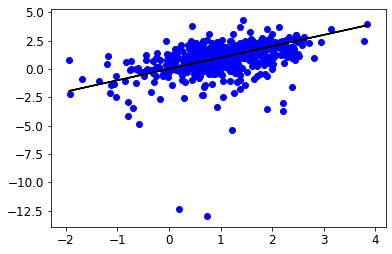

In [112]:
plt.plot(y_pred, y_pred, color='black')
plt.scatter(y_pred, y_test, color='blue')

In [110]:
mlp = MLPRegressor(solver="adam", hidden_layer_sizes=[400, 400, 400, 400], max_iter=400, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print("mean squared error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("r^2: {:.3f}".format(r2_score(y_test, y_pred)))
#print("Disbursement: ", round(mlp.score(X_train_scaled, y_train) - mlp.score(X_test_scaled, y_test), 4))

Accuracy on training set: 0.982
Accuracy on test set: 0.131
mean squared error: 1.952
r^2: 0.131
